# Expolatory Data Analysis on Indian Premier League

# Author : Damandeep Kaur
## Data Science and Business Analytics
### GRIP @ The Sparks Foundation
### Task #5 : "Exploratory Data Analysis : Sports (Indian Premier League)"
#### Problem Statement:
##### ->Find out the most successful teams, players and factors contributing win or loss of a team.
##### ->Suggest teams or players a company should endorse for its products.

## 1. Import the warnings and libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt , seaborn as sns
pd.set_option('display.max_columns',80)
pd.set_option('display.max_rows',250)

## 2. Reading the dataset

In [2]:
# Load matches dataset
df = pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
# Load deliveries dataset
df1 = pd.read_csv('deliveries.csv')
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


## 3. Data Merging

In [4]:
# Merging matches and deliveries datasets using left joins
ipl_df1 = pd.merge(df,df1,left_on='id',right_on='match_id',how='left')
ipl_df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
ipl_df1.shape

(179078, 39)

In [6]:
ipl_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                179078 non-null  int64 
 1   season            179078 non-null  int64 
 2   city              177378 non-null  object
 3   date              179078 non-null  object
 4   team1             179078 non-null  object
 5   team2             179078 non-null  object
 6   toss_winner       179078 non-null  object
 7   toss_decision     179078 non-null  object
 8   result            179078 non-null  object
 9   dl_applied        179078 non-null  int64 
 10  winner            178706 non-null  object
 11  win_by_runs       179078 non-null  int64 
 12  win_by_wickets    179078 non-null  int64 
 13  player_of_match   178706 non-null  object
 14  venue             179078 non-null  object
 15  umpire1           178578 non-null  object
 16  umpire2           178578 non-null  obj

In [7]:
ipl_df1.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,2013.444510,0.017914,13.404036,3.261579,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,3.363947,0.132639,23.261007,3.347033,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,2008.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,2011.000000,0.000000,0.000000,0.000000,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,2013.000000,0.000000,0.000000,3.000000,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2016.000000,0.000000,19.000000,6.000000,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [8]:
ipl_df1.isnull().sum()

id                       0
season                   0
city                  1700
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 372
win_by_runs              0
win_by_wickets           0
player_of_match        372
venue                    0
umpire1                500
umpire2                500
umpire3             150712
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
d

## 4. Data Cleaning

### Handling missing values

#### Note-> Looking at the data set "umpire3" has maximum number of missing values along with "umpire1" and "umpire2" also "fielder", "dismissal_kind","player_dismissed" so we will drop these columns

In [9]:
ipl_df1 = ipl_df1.drop(columns = ["fielder","dismissal_kind","player_dismissed","umpire3","umpire2","umpire1"])
ipl_df1.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


In [10]:
ipl_df1.isnull().sum()

id                    0
season                0
city               1700
date                  0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
result                0
dl_applied            0
winner              372
win_by_runs           0
win_by_wickets        0
player_of_match     372
venue                 0
match_id              0
inning                0
batting_team          0
bowling_team          0
over                  0
ball                  0
batsman               0
non_striker           0
bowler                0
is_super_over         0
wide_runs             0
bye_runs              0
legbye_runs           0
noball_runs           0
penalty_runs          0
batsman_runs          0
extra_runs            0
total_runs            0
dtype: int64

### Handling missing values for "winner" & "Player_of_match" columns

###### -> Looking at the dataset two columns are empty due to technical malfunction. So we can drop that entries from the dataset

In [11]:
ipl_df1 = ipl_df1.dropna(subset = ["winner","player_of_match"])
ipl_df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


#### Handling values for "city" column

In [12]:
(ipl_df1.isnull().mean()*100).sort_values(ascending = False)

city               0.951283
id                 0.000000
wide_runs          0.000000
over               0.000000
ball               0.000000
batsman            0.000000
non_striker        0.000000
bowler             0.000000
is_super_over      0.000000
bye_runs           0.000000
batting_team       0.000000
legbye_runs        0.000000
noball_runs        0.000000
penalty_runs       0.000000
batsman_runs       0.000000
extra_runs         0.000000
bowling_team       0.000000
inning             0.000000
season             0.000000
match_id           0.000000
venue              0.000000
player_of_match    0.000000
win_by_wickets     0.000000
win_by_runs        0.000000
winner             0.000000
dl_applied         0.000000
result             0.000000
toss_decision      0.000000
toss_winner        0.000000
team2              0.000000
team1              0.000000
date               0.000000
total_runs         0.000000
dtype: float64

In [13]:
ipl_df1["city"].isnull().sum()

1700

In [14]:
ipl_df1.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [15]:
ipl_df1.city.nunique()

32

#### "city" is related to venue so we will also check that column

In [16]:
ipl_df1[ipl_df1["city"].isnull()][["city","venue"]]

,city,venue
109377,NaN,Dubai International Cricket Stadium
109378,NaN,Dubai International Cricket Stadium
109379,NaN,Dubai International Cricket Stadium
109380,NaN,Dubai International Cricket Stadium
109381,NaN,Dubai International Cricket Stadium
...,...,...
113170,NaN,Dubai International Cricket Stadium
113171,NaN,Dubai International Cricket Stadium
113172,NaN,Dubai International Cricket Stadium
113173,NaN,Dubai International Cricket Stadium


#### All the missing values are from "Dubai International Cricket Stadium",so we can fill the missing value by "Dubai".

In [17]:
ipl_df1["city"] = ipl_df1["city"].fillna("Dubai")
ipl_df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


In [18]:
ipl_df1["city"].isnull().sum()

0

In [19]:
ipl_df1 = ipl_df1.drop(columns = ["id","match_id"])
ipl_df1.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


In [20]:
ipl_df1.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
inning             0
batting_team       0
bowling_team       0
over               0
ball               0
batsman            0
non_striker        0
bowler             0
is_super_over      0
wide_runs          0
bye_runs           0
legbye_runs        0
noball_runs        0
penalty_runs       0
batsman_runs       0
extra_runs         0
total_runs         0
dtype: int64

 ##### Note --- Now both the datasets are clean and there are no missing values present.

In [21]:
# Convert the 'date' column to a datetime data type for date - based analysis
ipl_df1['date'] = pd.to_datetime(ipl_df1['date'])

ipl_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178706 entries, 0 to 179077
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   season           178706 non-null  int64         
 1   city             178706 non-null  object        
 2   date             178706 non-null  datetime64[ns]
 3   team1            178706 non-null  object        
 4   team2            178706 non-null  object        
 5   toss_winner      178706 non-null  object        
 6   toss_decision    178706 non-null  object        
 7   result           178706 non-null  object        
 8   dl_applied       178706 non-null  int64         
 9   winner           178706 non-null  object        
 10  win_by_runs      178706 non-null  int64         
 11  win_by_wickets   178706 non-null  int64         
 12  player_of_match  178706 non-null  object        
 13  venue            178706 non-null  object        
 14  inning           178

In [22]:
ipl_df1.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
inning             0
batting_team       0
bowling_team       0
over               0
ball               0
batsman            0
non_striker        0
bowler             0
is_super_over      0
wide_runs          0
bye_runs           0
legbye_runs        0
noball_runs        0
penalty_runs       0
batsman_runs       0
extra_runs         0
total_runs         0
dtype: int64

### Save this data for further visualisation on tools like Tableau or Power Bi

In [23]:
# ipl_df1.to_csv("Mactches_cleaned.csv","Deliveries_cleaned.csv", index=False)

-------------------------

### 5. EDA- Exploratory Data Analysis

 ####  Total number of Matches played in each season 

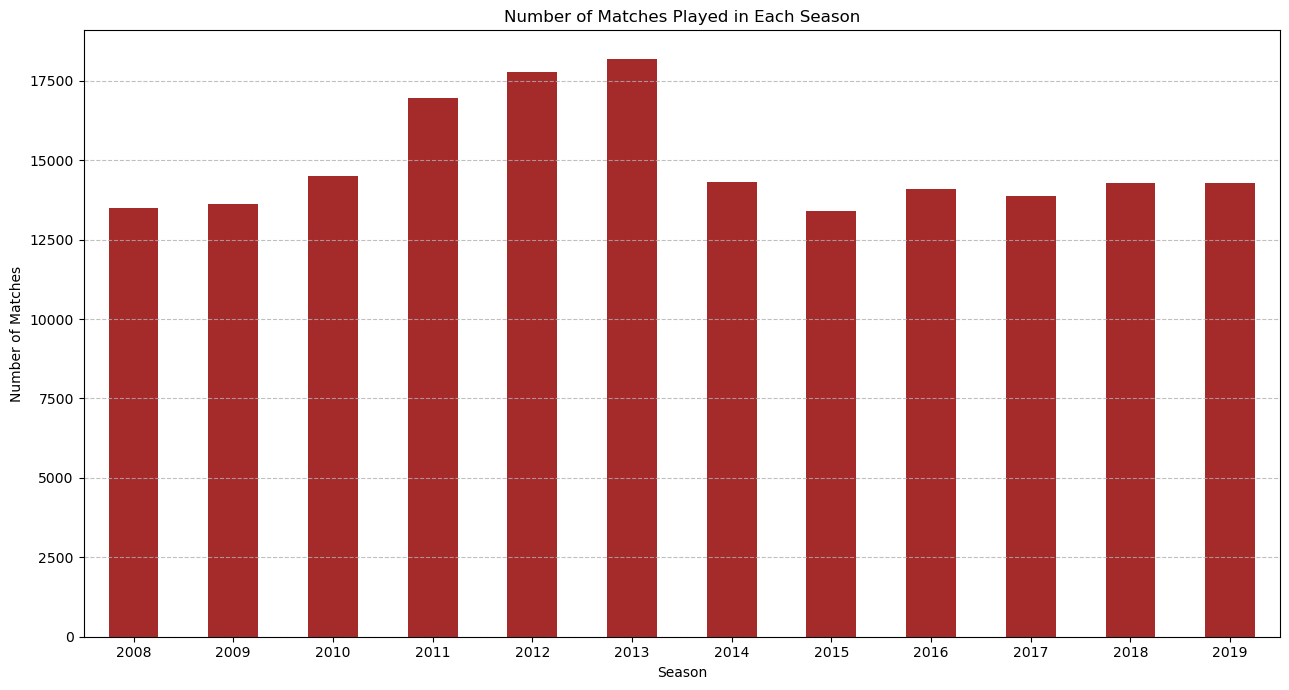

In [24]:
matches_per_season = ipl_df1['season'].value_counts().sort_index()

plt.figure(figsize=(13, 7))
matches_per_season.plot(kind='bar', color='brown')
plt.title('Number of Matches Played in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()


#### In 2011, 2012 and 2013, most of the 70 matches were played during these years.

#### Total number of team participated in each season

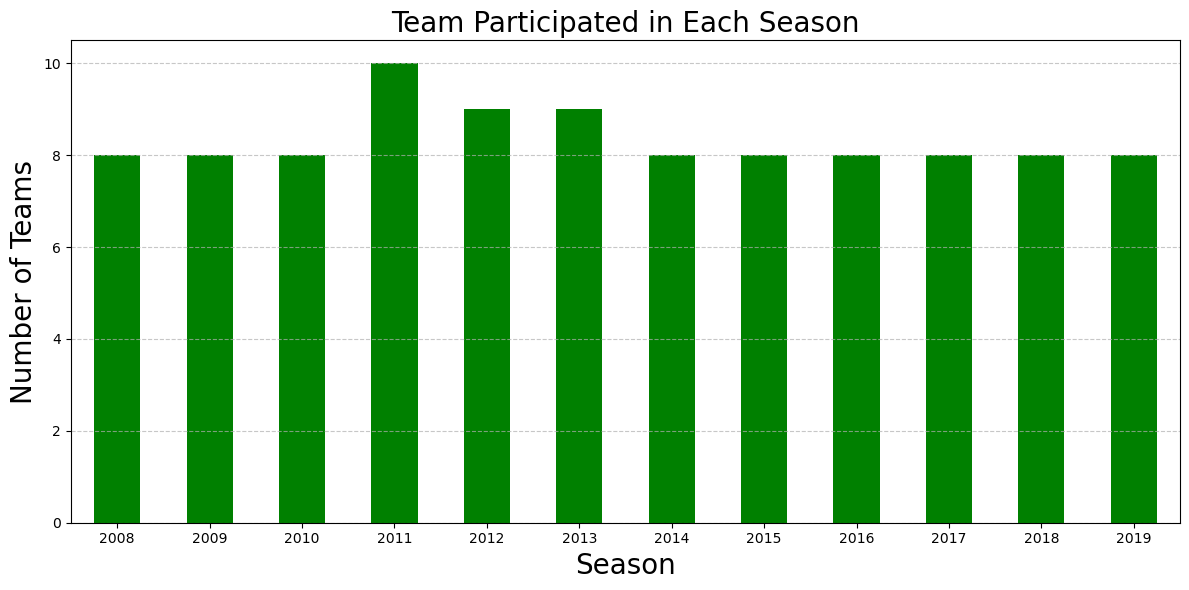

In [25]:
season_participation = ipl_df1.groupby('season')['team1'].nunique()

plt.figure(figsize=(12, 6))
season_participation.plot(kind='bar', color='green')
plt.title('Team Participated in Each Season', size=20)
plt.xlabel('Season', size=20)
plt.ylabel('Number of Teams', size=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### In 2011, 10 teams participated, followed by 9 teams participated in 2012 and 2013.

### Number of times team won toss

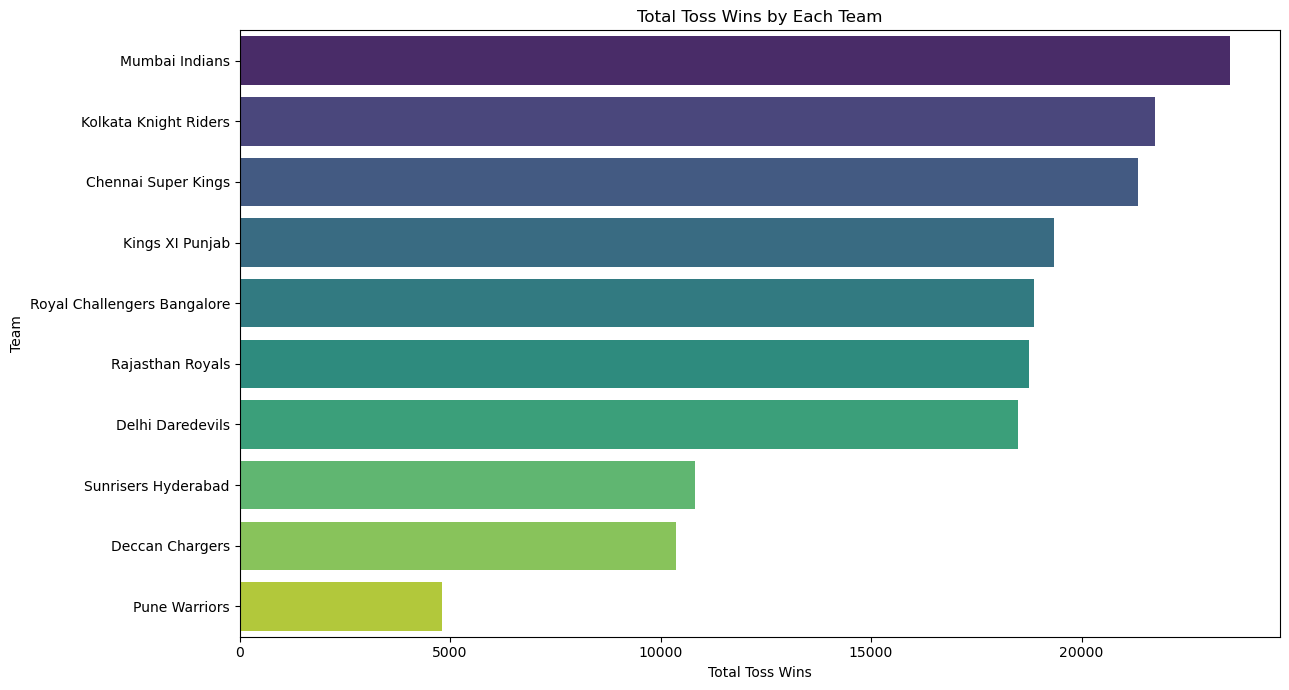

In [26]:
toss_wins = ipl_df1['toss_winner'].value_counts().reset_index()[:10]
toss_wins.columns = ['Team', 'Toss Wins']

plt.figure(figsize=(13, 7))
sns.barplot(x='Toss Wins', y='Team', data=toss_wins, palette='viridis')
plt.title('Total Toss Wins by Each Team')
plt.xlabel('Total Toss Wins')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

### Toss Decisions made after winning the toss

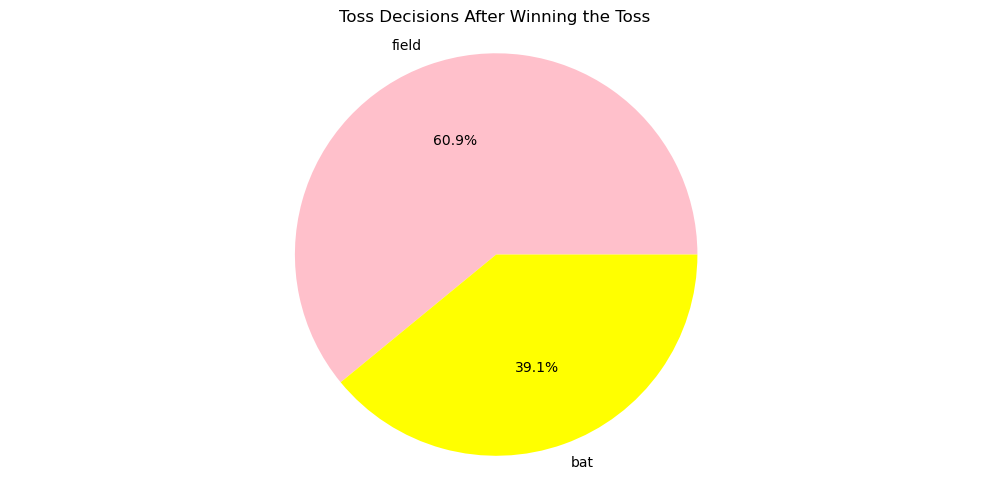

In [27]:
toss_decisions = ipl_df1['toss_decision'].value_counts()

plt.figure(figsize=(10, 5))
plt.pie(toss_decisions, labels=toss_decisions.index, autopct='%1.1f%%', colors=['pink', 'yellow'])
plt.title('Toss Decisions After Winning the Toss')
plt.axis('equal')
plt.tight_layout()
plt.show()

#### After winning the toss the team select to do fielding rather than bat.

### Total Number of Matches Won by Each Team

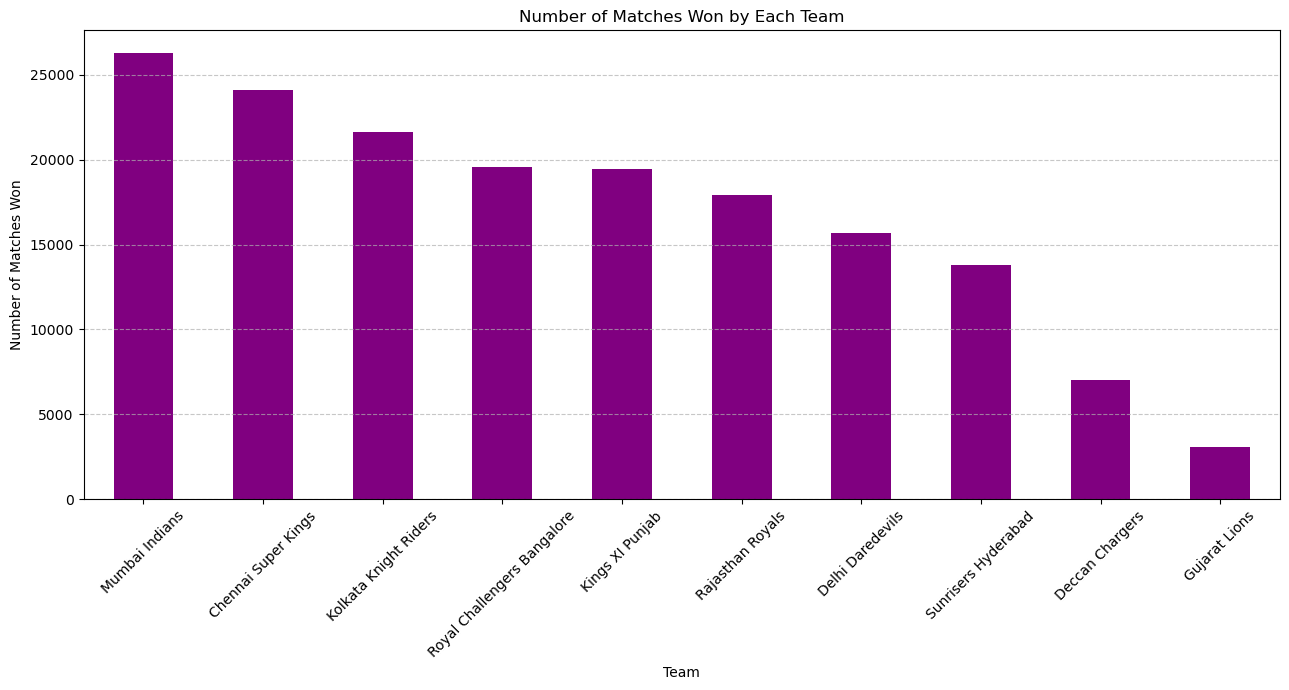

In [28]:
matches_won_by_team = ipl_df1['winner'].value_counts()[0:10]

plt.figure(figsize=(13, 7))
matches_won_by_team.plot(kind='bar', color='purple')
plt.title('Number of Matches Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches Won')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 'Mumbai Indians' & 'Chennai Super Kings' are the top winner in the IPL Season. 'Mumbai Indians' won more than 100 matches and is on the top rank while 'Chennai Super Kings' is on the 2nd rank of the top team won each match

### Top Matches played in each Venue

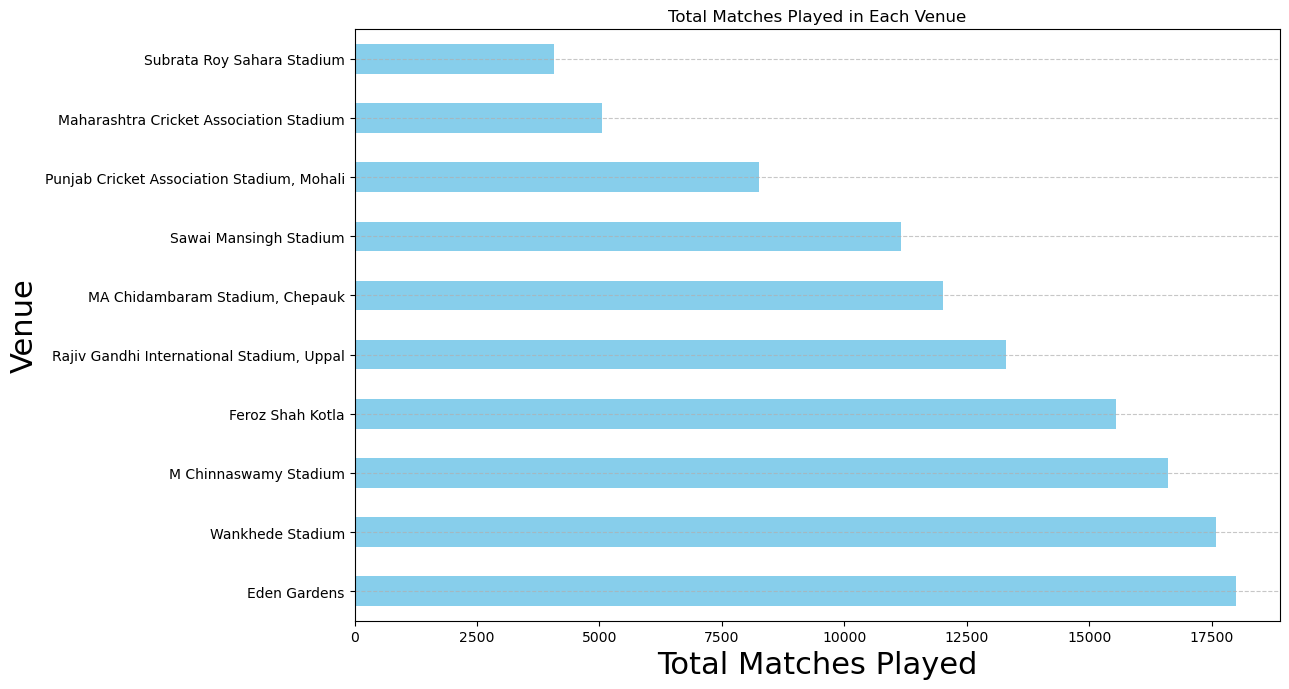

In [29]:
matches_per_venue = ipl_df1['venue'].value_counts()[0:10]

plt.figure(figsize=(13, 7))
matches_per_venue.plot(kind='barh', color='skyblue')
plt.title('Total Matches Played in Each Venue')
plt.xlabel('Total Matches Played', size = 22)
plt.ylabel('Venue', size = 22)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Maximum number of matches played in "Eden Garden" & "Wankhede Stadium".
#### Eden Gardens is well- known among the various grounds in India and internationally.
#### The Wankhede ground in Mumbai is India's largest cricket venues and was the site of the 2011 World Cup match.


### Highest Runs scoring team in the IPL seson

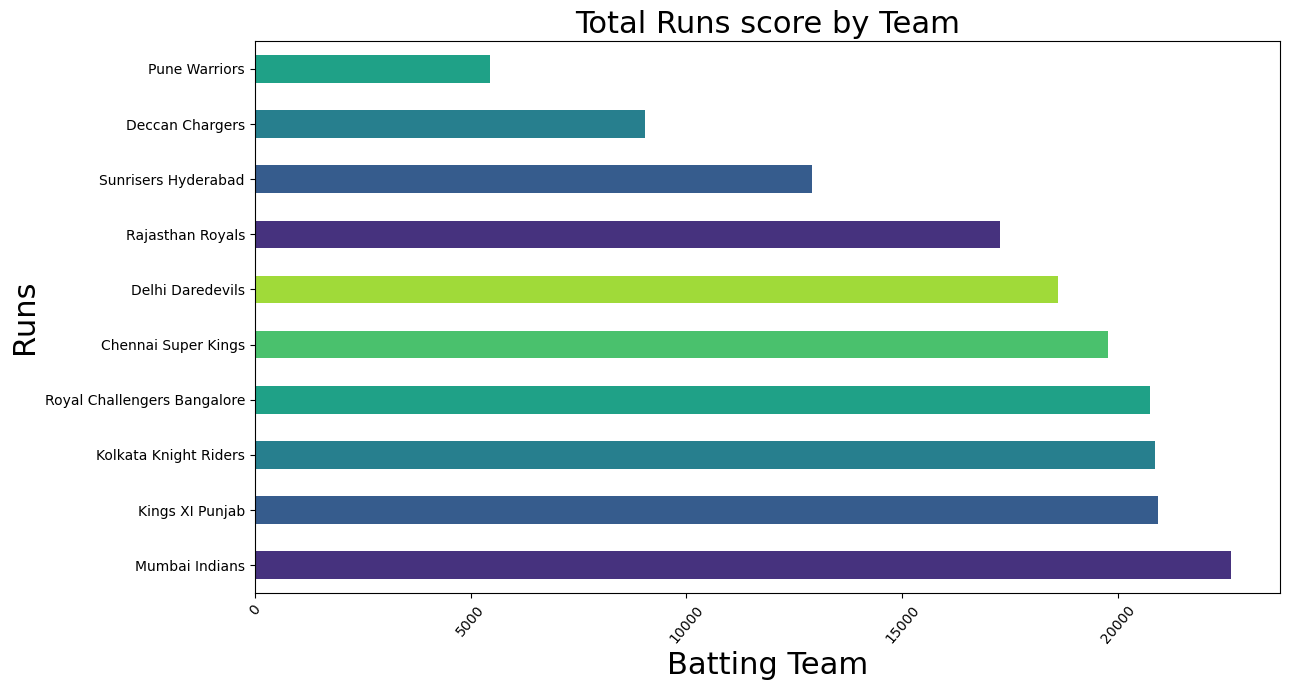

In [30]:
plt.figure(figsize=(13, 7))
ipl_df1['batting_team'].value_counts()[0:10].plot(kind='barh', color=sns.color_palette('viridis'))
plt.title('Total Runs score by Team', size=22)
plt.xlabel('Batting Team', size=22)
plt.ylabel('Runs', size=22)
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

### Top Man of the Match Performers

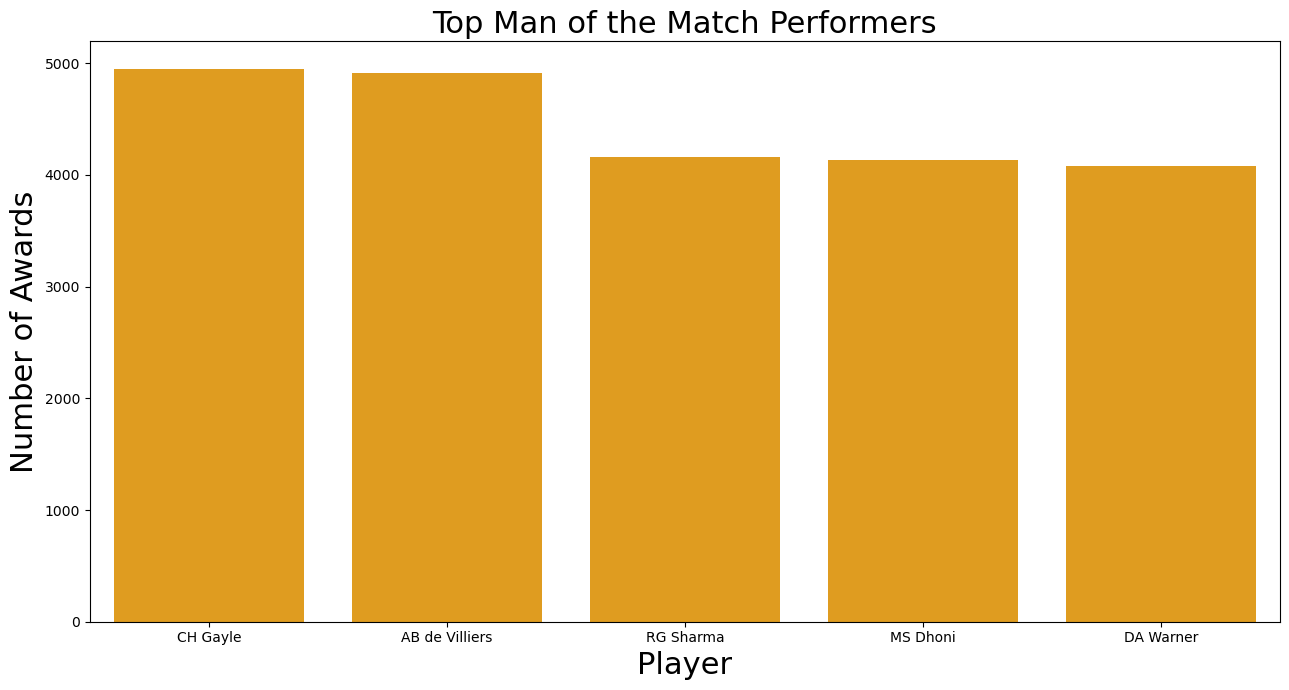

In [31]:
top_players = ipl_df1['player_of_match'].value_counts().head(5)

plt.figure(figsize=(13, 7))
sns.barplot(x=top_players.index, y=top_players.values, color="orange")
plt.title('Top Man of the Match Performers', size=22)
plt.xlabel('Player', size=22)
plt.ylabel('Number of Awards', size=22)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### CH Gayle and AB de Villiers were the top man of the match performers.

### Top 5 Teams scoring maximum runs

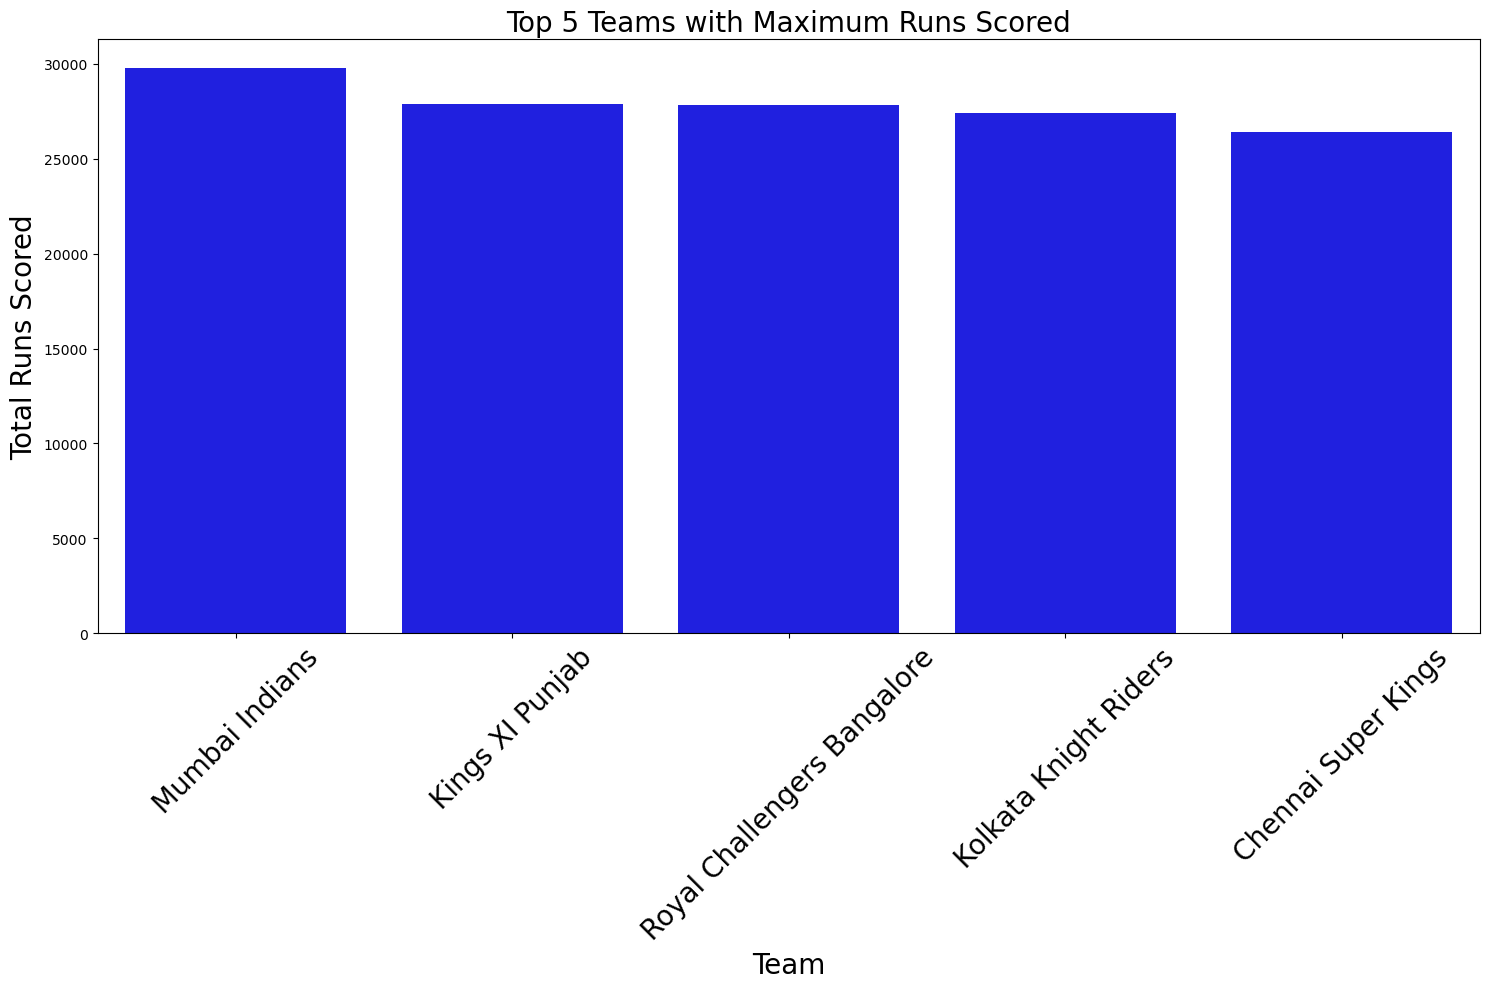

In [32]:
runs_scored_by_team = ipl_df1.groupby('batting_team')['total_runs'].sum().reset_index()
top_5_teams = runs_scored_by_team.sort_values(by='total_runs', ascending=False).head(5)

plt.figure(figsize=(15, 10))
sns.barplot(x='batting_team', y='total_runs', data=top_5_teams, color='blue')
plt.title('Top 5 Teams with Maximum Runs Scored', size=20)
plt.xlabel('Team', size=20)
plt.ylabel('Total Runs Scored', size=20)
plt.xticks(rotation=45, size=20)
plt.tight_layout()
plt.show()

#### Top 5 teams scoring maximum runs are - "Mumbai Indians", "Kings XI Punjab", "Royal Chanllengers Bangalore", "Kolkata Knight Riders", Chennai Super Kings

### Top 5 Batsmen scoring maximum runs

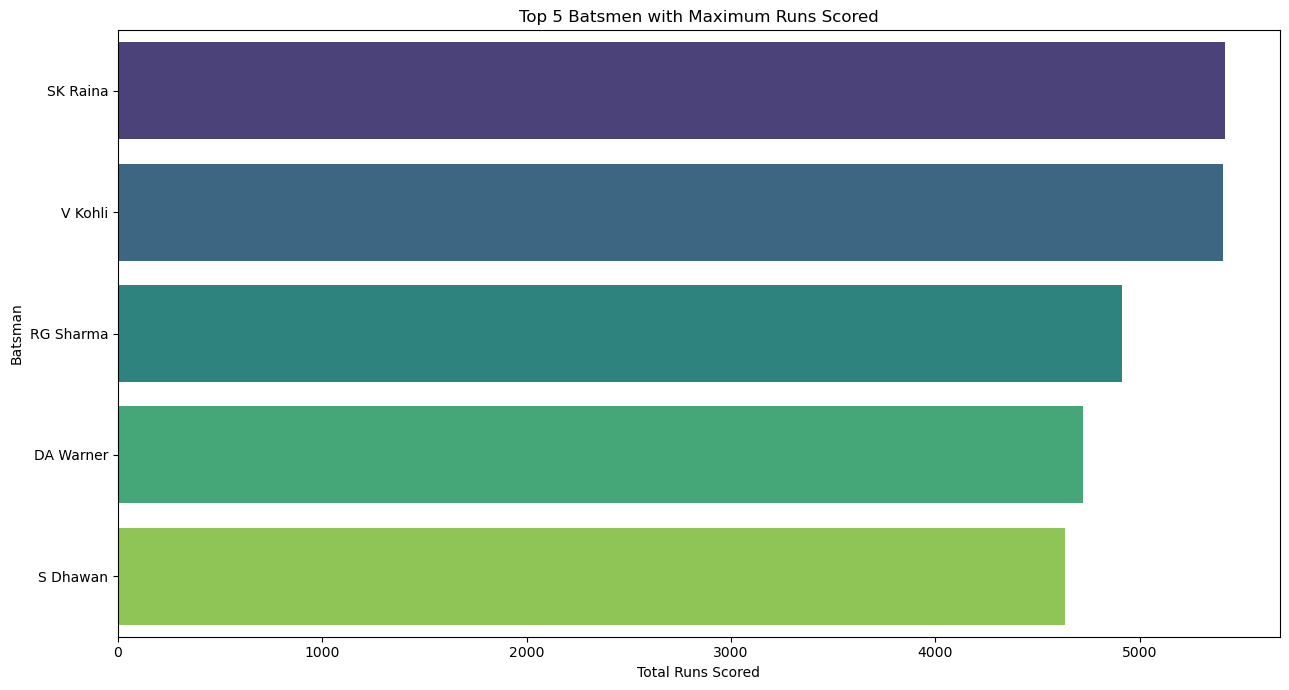

In [33]:
runs_scored_by_batsman = ipl_df1.groupby('batsman')['batsman_runs'].sum().reset_index()

top_5_batsmen = runs_scored_by_batsman.sort_values(by='batsman_runs', ascending=False).head(5)

plt.figure(figsize=(13, 7))
sns.barplot(x='batsman_runs', y='batsman', data=top_5_batsmen, palette='viridis')
plt.title('Top 5 Batsmen with Maximum Runs Scored')
plt.xlabel('Total Runs Scored')
plt.ylabel('Batsman')
plt.tight_layout()
plt.show()

### Top Batsmen with highest strike rate

In [35]:
no_of_balls = pd.DataFrame(ipl_df1.groupby('batsman')['ball'].count())
runs = pd.DataFrame(ipl_df1.groupby('batsman')['batsman_runs'].sum())
seasons = pd.DataFrame(ipl_df1.groupby('batsman')['season'].nunique())

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)
batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100

highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',ascending = False)
highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.707880
213,10,KA Pollard,141.751527
112,10,DA Warner,139.374262
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.181818
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


### Highest strike rate

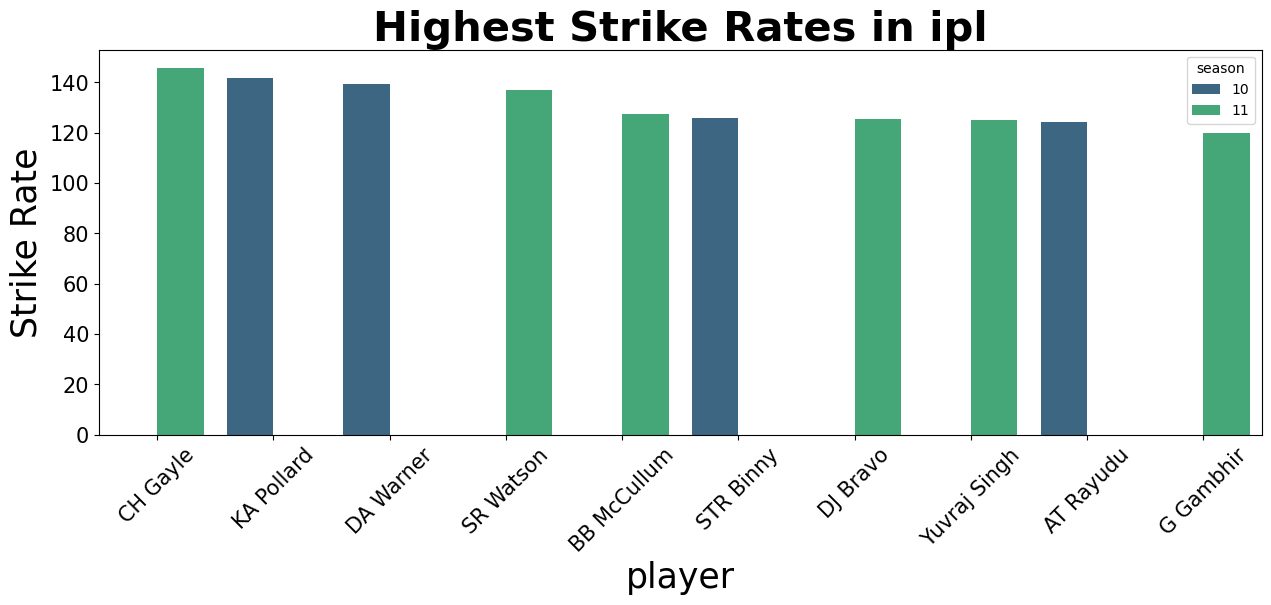

In [36]:
plt.figure(figsize=(15, 5))
sns.barplot(x='batsman', y='strike_rate', data=highest_strike_rate.head(10), hue='season', palette='viridis')
plt.title("Highest Strike Rates in ipl", fontsize=30, fontweight='bold')
plt.xlabel("player", size=25)
plt.ylabel("Strike Rate", size=25)
plt.xticks(size=15, rotation=45)
plt.yticks(size=15)
plt.show()

## Conclusion:

### -> There are total 12 season played. In 2011, 10 teams participated which is highest among all. In 2011, 2012 & 2013 more than 70 matches were played which were highest in numbers.
### -> Maximum number of matches played in "Eden Gardens" & "Wankhede Stadium".
### -> Top Winner in the IPL Season were "Mumbai Indians" & "Chennai Super King". Mumbai Indians were on top rank won more than 100 matches where as Chennai Super Kings were on the 2nd rank with 100 matches.
### -> After winning the toss, most of the them like to choose fielding first rather than batting and 60.9% team choose fielding first and 39.1% team choose batting first.
### -> Kolkata Knight Riders, Mumbai Indians & Chennai Super Kings were the top winner in winning the toss.
### ->Mumbai Indians, Kings XI Punjab, Royal Challengers Bangalore, Chennai Super Kings & Kolkata Knight Riders werethe top 5 Teams with more than 25000 Runs in IPL season.
### -> MS Dhoni, DA Warner, CH Gayle, AB de Villiers, RG Sharma were the top 5 players with more than 15 times won player of the match award in the IPL season.
### -> SK Raina, RG Sharma, DA Warner, V Kohli, S Dhawan were the top 5 Batsman with highest runs scorer in the IPL season.
### -> Top 5 Batsman with highest strike rate were CH Gayle, KA Pollard, DA Warner, SR Watson.

## Suggestions


### 1. If the company is looking for successfull team for promoting its products are : Mumbai Indians, Royal Challengers Bangalore, Kings XI Punajb, Chennai Super Kings and Kolkata Knight Riders as they all are successful teams with highest popularity among people.
### 2. If the company is looking for star player, then CH Gayle, AB de Villiers, RG Sharma, MS Dhoni, DA Warner as these players have consistently propelled their respective teams to victory through exceptional individual contributions.
### 3. If the company is looking for top Batsman, V Kohli, RG Sharma, SK Raina, DA Warner, S Dhawan are the most successful Batsman.